<a href="https://colab.research.google.com/github/AmrtanshuBharadwaj/cv/blob/main/Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graph from node list

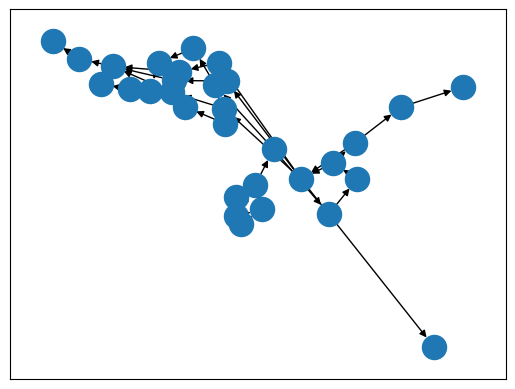

In [ ]:
import networkx as nx
import json

node_id_list = list()
edge_id_list = list()

with open("/content/p2a9nodes.json", 'r') as node_file:          #/content/p2a9nodes.json is the json file with nodes
    node_data_json = json.load(node_file)
    for node in node_data_json:
        node_id_list.append(node['_id'])

with open("/content/p2a9edges.json", 'r') as edge_file:          #/content/p2a9eddges.json is the json file with edges
    edge_data_json = json.load(edge_file) 
    for edge in edge_data_json: 
        edge_id_list.append((edge['_from'], edge['_to'], {'_id': edge['_id']}))

B = nx.DiGraph()
B.add_nodes_from(node_id_list) 
B.add_edges_from(edge_id_list)

#Draw with options
nx.draw_networkx(B, with_labels=False, arrows=True)

fxn

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def extract_patches(patch_size, graph, covering=True, num_patches=None, patch_overlap=False):
    if covering:
        extracted_patches = extract_patches_covering(patch_size, graph, patch_overlap)
    else:
        extracted_patches = extract_specific_patches(patch_size, graph, num_patches, patch_overlap)
    
    return extracted_patches

def extract_patches_covering(patch_size, graph, patch_overlap):
    extracted_patches = []
    nodes = list(graph.nodes())
    
    while len(nodes) > 0:
        selected_node = random.choice(nodes)
        patch = extract_patch(graph, patch_size, selected_node, patch_overlap)
        nodes = [node for node in nodes if node not in patch]
        extracted_patches.append(patch)
    
    return extracted_patches

def extract_specific_patches(patch_size, graph, num_patches, patch_overlap):
    extracted_patches = []
    nodes = list(graph.nodes())
    
    for _ in range(num_patches):
        if len(nodes) < patch_size:
            break
        
        selected_node = random.choice(nodes)
        patch = extract_patch(graph, patch_size, selected_node, patch_overlap)
        nodes = [node for node in nodes if node not in patch]
        extracted_patches.append(patch)
    
    return extracted_patches

def extract_patch(graph, patch_size, start_node, patch_overlap):
    patch = [start_node]
    frontier = [start_node]
    
    while len(patch) < patch_size and len(frontier) > 0:
        current_node = frontier.pop(0)
        neighbors = list(graph.neighbors(current_node))
        
        if patch_overlap:
            patch.extend(neighbors)
            frontier.extend(neighbors)
        else:
            non_overlap_neighbors = [neighbor for neighbor in neighbors if neighbor not in patch]
            patch.extend(non_overlap_neighbors)
            frontier.extend(non_overlap_neighbors)
    
    return patch

def plot_graph(graph, nodes):
    subgraph = graph.subgraph(nodes)
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True)
    plt.show()


#Converting the patch to JSON

def convert_patch_to_json(patch):
    graph = nx.DiGraph()
    graph.add_nodes_from(patch)
    graph.add_edges_from([(u, v) for u, v in zip(patch[:-1], patch[1:])])

    patch_nodes_json = json.dumps(list(graph.nodes()))
    patch_edges_json = json.dumps(list(graph.edges()))
    
    return patch_nodes_json, patch_edges_json




trial run

Patch 1: ['p2a9nodes/144559', 'p2a9nodes/144556', 'p2a9nodes/144557', 'p2a9nodes/144558', 'p2a9nodes/144560']


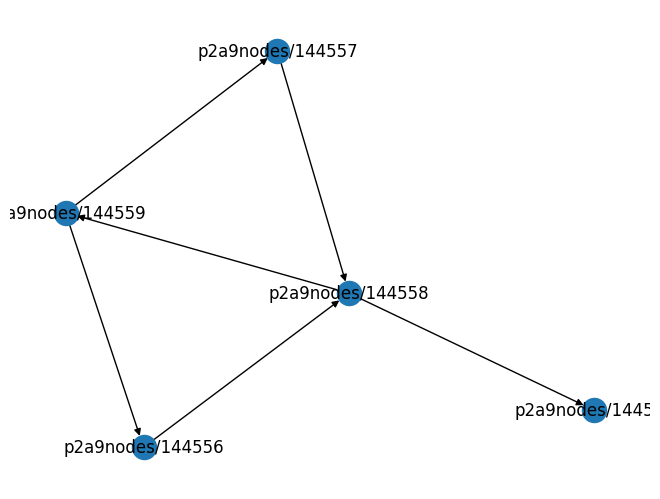

Patch 2: ['p2a9nodes/144584']


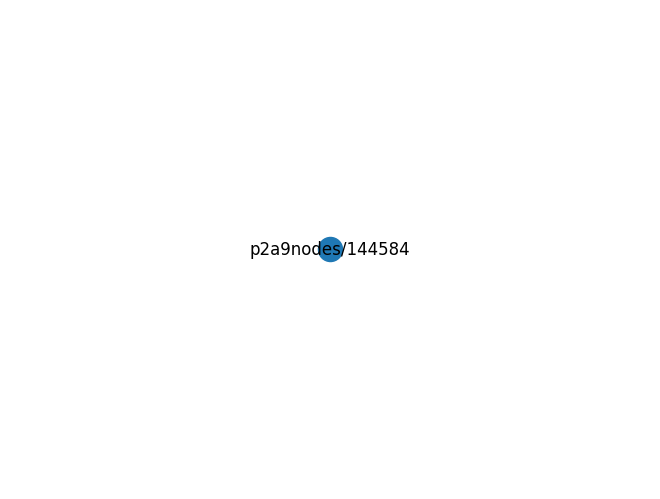

Patch 3: ['p2a9nodes/144555', 'p2a9nodes/144556', 'p2a9nodes/144557', 'p2a9nodes/144558', 'p2a9nodes/144559', 'p2a9nodes/144560']


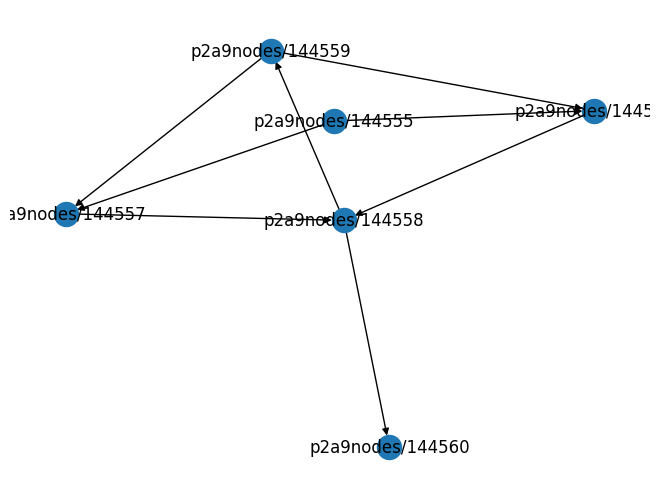

Patch 4: ['p2a9nodes/144566', 'p2a9nodes/144567', 'p2a9nodes/144568', 'p2a9nodes/144580', 'p2a9nodes/144581']


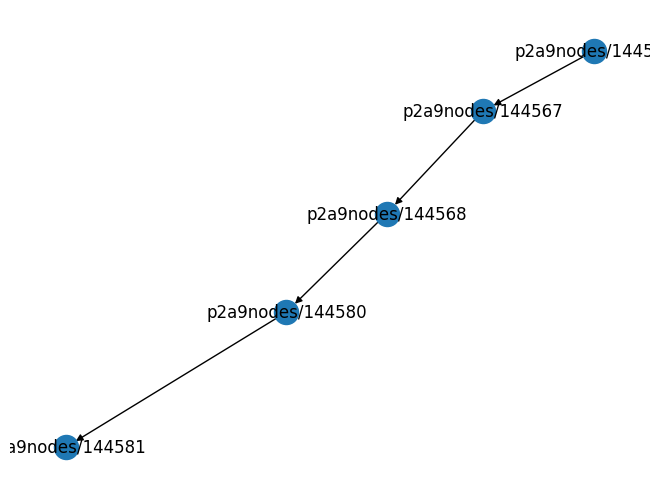

Patch 5: ['p2a9nodes/144573', 'p2a9nodes/144574', 'p2a9nodes/144576', 'p2a9nodes/144578', 'p2a9nodes/144585']


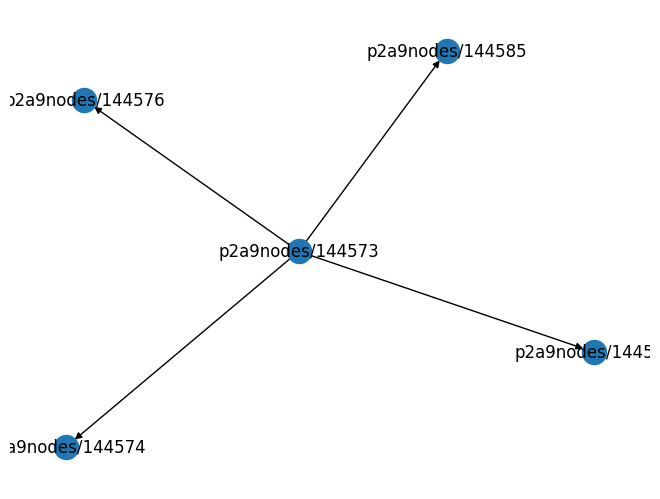

Patch 6: ['p2a9nodes/144564', 'p2a9nodes/144566', 'p2a9nodes/144567', 'p2a9nodes/144568', 'p2a9nodes/144580']


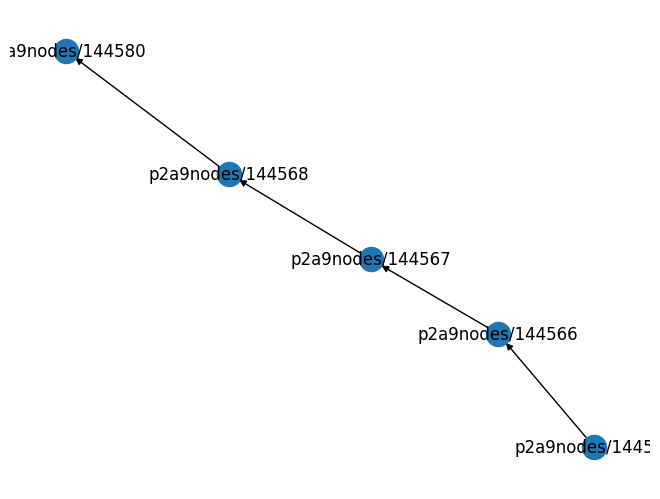

Patch 7: ['p2a9nodes/144569', 'p2a9nodes/144570', 'p2a9nodes/144571', 'p2a9nodes/144572', 'p2a9nodes/144573']


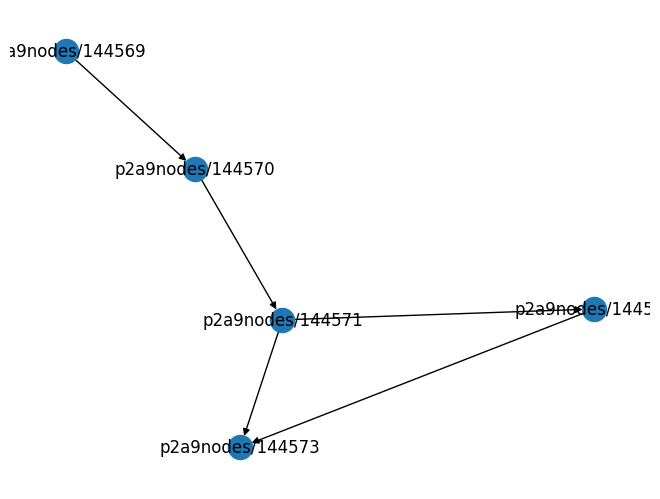

Patch 8: ['p2a9nodes/144583', 'p2a9nodes/144584']


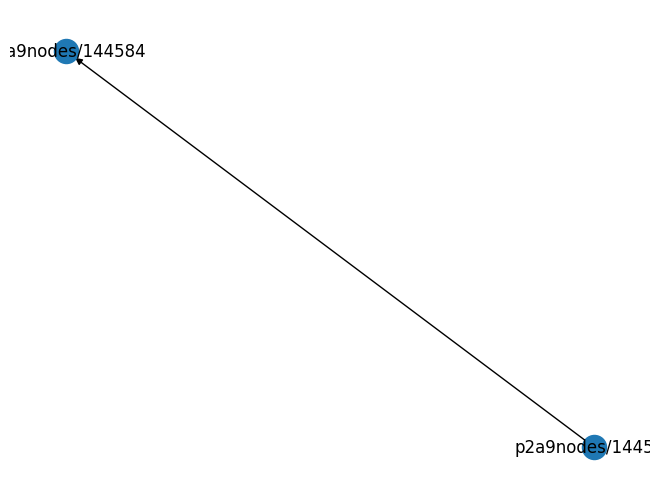

Patch 9: ['p2a9nodes/144577', 'p2a9nodes/144580', 'p2a9nodes/144581', 'p2a9nodes/144582']


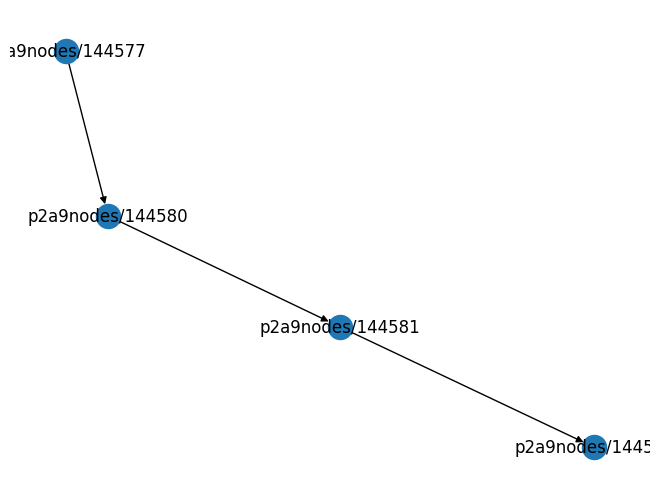

Patch 10: ['p2a9nodes/144561', 'p2a9nodes/144562', 'p2a9nodes/144563', 'p2a9nodes/144565', 'p2a9nodes/144564']


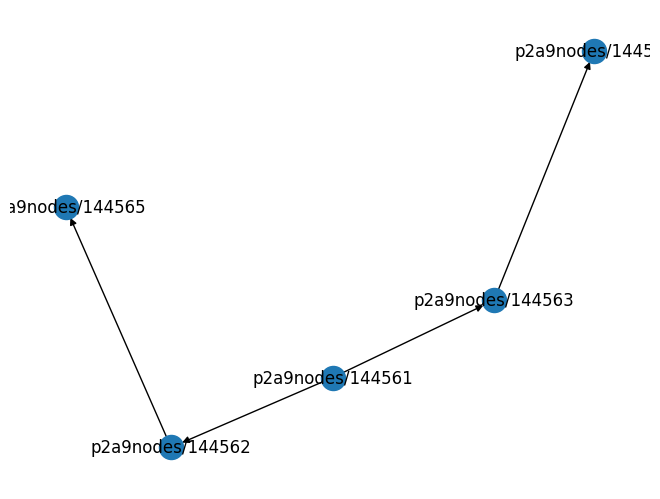

Patch 11: ['p2a9nodes/144579', 'p2a9nodes/144580', 'p2a9nodes/144581', 'p2a9nodes/144582']


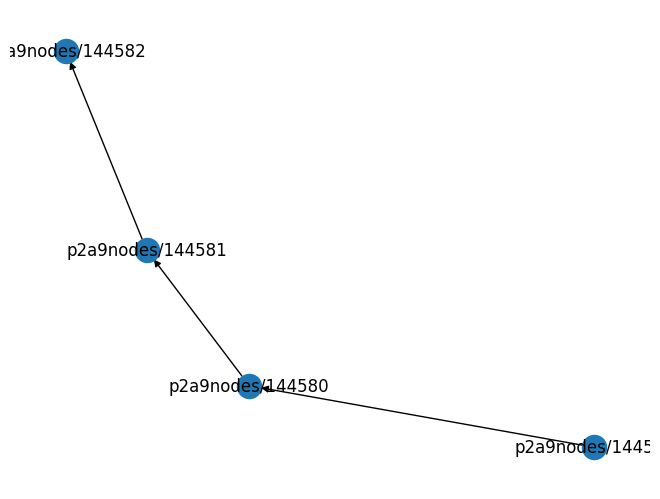

Patch 12: ['p2a9nodes/144575', 'p2a9nodes/144580', 'p2a9nodes/144581', 'p2a9nodes/144582']


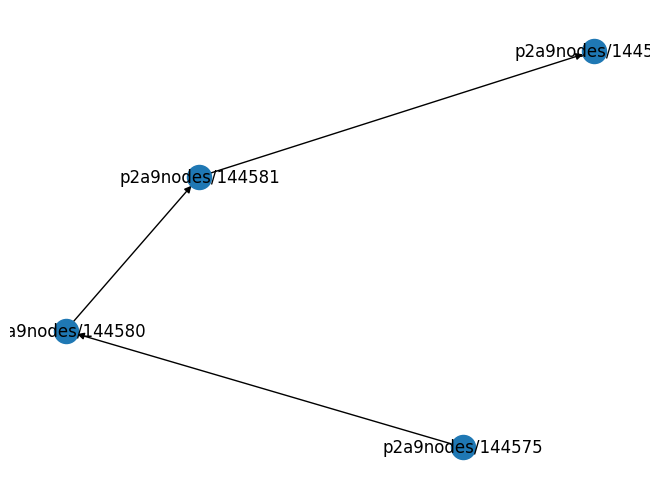

Nodes JSON: ["p2a9nodes/144559", "p2a9nodes/144556", "p2a9nodes/144557", "p2a9nodes/144558", "p2a9nodes/144560"]
Edges JSON: [["p2a9nodes/144559", "p2a9nodes/144556"], ["p2a9nodes/144556", "p2a9nodes/144557"], ["p2a9nodes/144557", "p2a9nodes/144558"], ["p2a9nodes/144558", "p2a9nodes/144560"]]
---
Nodes JSON: ["p2a9nodes/144584"]
Edges JSON: []
---
Nodes JSON: ["p2a9nodes/144555", "p2a9nodes/144556", "p2a9nodes/144557", "p2a9nodes/144558", "p2a9nodes/144559", "p2a9nodes/144560"]
Edges JSON: [["p2a9nodes/144555", "p2a9nodes/144556"], ["p2a9nodes/144556", "p2a9nodes/144557"], ["p2a9nodes/144557", "p2a9nodes/144558"], ["p2a9nodes/144558", "p2a9nodes/144559"], ["p2a9nodes/144559", "p2a9nodes/144560"]]
---
Nodes JSON: ["p2a9nodes/144566", "p2a9nodes/144567", "p2a9nodes/144568", "p2a9nodes/144580", "p2a9nodes/144581"]
Edges JSON: [["p2a9nodes/144566", "p2a9nodes/144567"], ["p2a9nodes/144567", "p2a9nodes/144568"], ["p2a9nodes/144568", "p2a9nodes/144580"], ["p2a9nodes/144580", "p2a9nodes/144581

In [ ]:
patches = extract_patches(5, B, covering=True, num_patches=3, patch_overlap=False)
for i, patch in enumerate(patches):
    print(f"Patch {i+1}: {patch}")
    plot_graph(B, patch)

# Printing the JSON representation of each patch
for patch in patches:
    patch_nodes_json, patch_edges_json = convert_patch_to_json(patch)
    print('Nodes JSON:', patch_nodes_json)
    print('Edges JSON:', patch_edges_json)
    print('---')

   